In [1]:
# IMPORTAÇÕES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# CARREGAR DATASET
df = pd.read_csv('/content/ds_salaries.csv', index_col=0)
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [3]:
# INFORMAÇÕES GERAIS DO DATASET
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB


In [4]:
# ESTATÍSTICAS DESCRITIVAS
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


In [5]:
# COLUNAS NO DATASET
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [6]:
# VERIFICAR VALORES NULOS
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [7]:
# SUBSTITUIR VALORES NA COLUNA 'experience_level'
df['experience_level'] = df['experience_level'].replace('EN', 'Iniciante')
df['experience_level'] = df['experience_level'].replace('EX', 'Experiente')
df['experience_level'] = df['experience_level'].replace('MI', 'Intermediário')
df['experience_level'] = df['experience_level'].replace('SE', 'Sênior')

# SUBSTITUIR VALORES NA COLUNA 'employment_type'
df['employment_type'] = df['employment_type'].replace('FT', 'Período Integral')
df['employment_type'] = df['employment_type'].replace('CT', 'Contratado')
df['employment_type'] = df['employment_type'].replace('FL', 'Freelancer')
df['employment_type'] = df['employment_type'].replace('PT', 'Meio Período')

# SUBSTITUIR VALORES NA COLUNA 'company_size'
df['company_size'] = df['company_size'].replace('L', "Grande")
df['company_size'] = df['company_size'].replace('M', "Média")
df['company_size'] = df['company_size'].replace('S', "Pequena")

In [10]:
# EXIBIR AS PRIMEIRAS LINHAS DO DATASET APÓS ALTERAÇÕES
df.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Intermediário,Período Integral,Data Scientist,70000,EUR,79833,DE,0,DE,Grande
1,2020,Sênior,Período Integral,Machine Learning Scientist,260000,USD,260000,JP,0,JP,Pequena
2,2020,Sênior,Período Integral,Big Data Engineer,85000,GBP,109024,GB,50,GB,Média
3,2020,Intermediário,Período Integral,Product Data Analyst,20000,USD,20000,HN,0,HN,Pequena
4,2020,Sênior,Período Integral,Machine Learning Engineer,150000,USD,150000,US,50,US,Grande


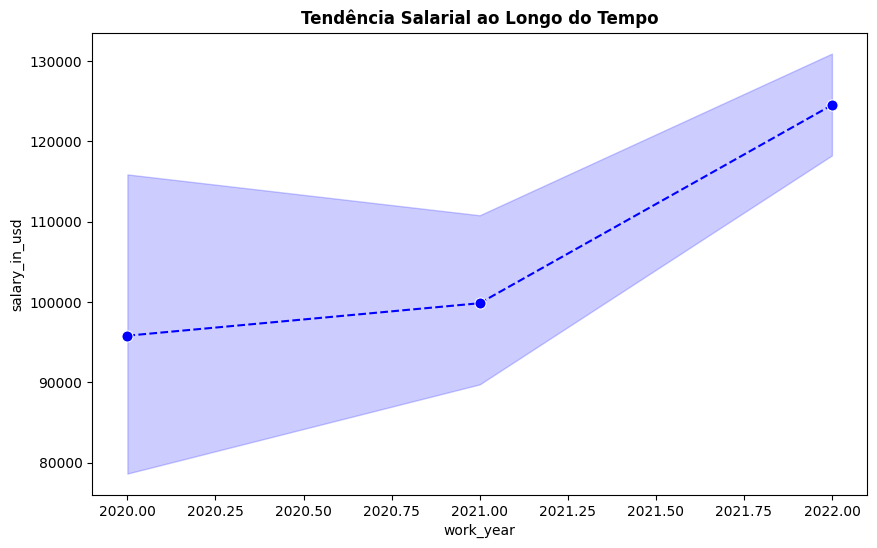

In [11]:
# TENDÊNCIA SALARIAL AO LONGO DO TEMPO
plt.figure(figsize=(10, 6))
tendencia_salarial = df[['salary_in_usd', 'work_year']].sort_values(by='work_year')
sns.lineplot(data=tendencia_salarial, x='work_year', y='salary_in_usd', marker='o', linestyle='--', color='Blue', markersize=8)
plt.title('Tendência Salarial ao Longo do Tempo', fontsize=12, fontweight='bold')
plt.show()

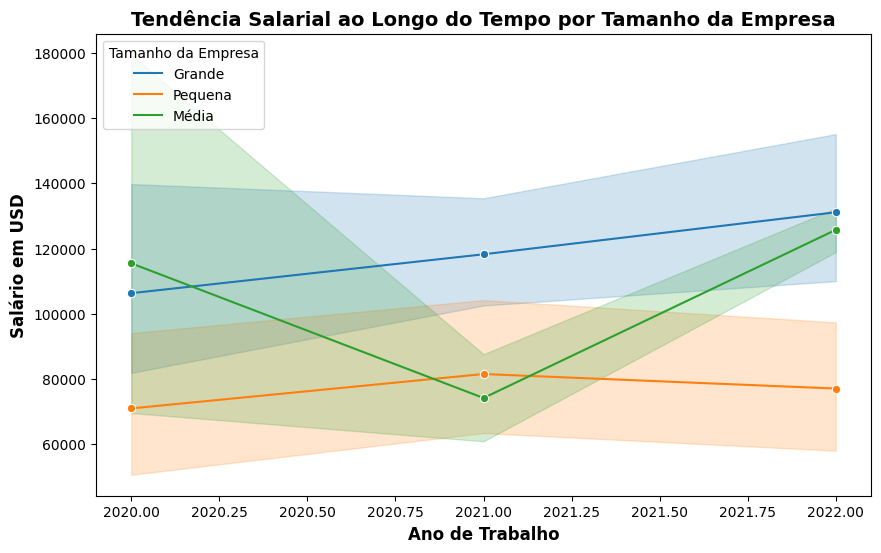

In [12]:
# TENDÊNCIA SALARIAL AO LONGO DO TEMPO POR TAMANHO DA EMPRESA
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='work_year', y='salary_in_usd', hue='company_size', marker='o')
plt.xlabel('Ano de Trabalho', fontsize=12, fontweight='bold')
plt.ylabel('Salário em USD', fontsize=12, fontweight='bold')
plt.legend(title='Tamanho da Empresa', title_fontsize=10, fontsize=10, loc='upper left')
plt.title('Tendência Salarial ao Longo do Tempo por Tamanho da Empresa', fontsize=14, fontweight='bold')
plt.show()

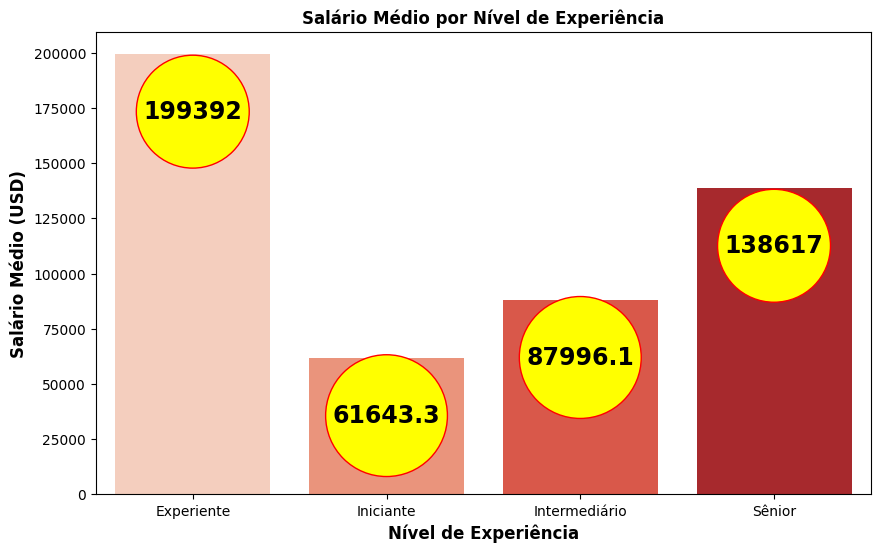

In [13]:
# SALÁRIO MÉDIO POR NÍVEL DE EXPERIÊNCIA
salario_por_nivel = df.groupby('experience_level')['salary_in_usd'].mean()
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=salario_por_nivel.index, y=salario_por_nivel.values, palette='Reds')
plt.title('Salário Médio por Nível de Experiência', fontsize=12, fontweight='bold')
plt.xlabel('Nível de Experiência', fontsize=12, fontweight='bold')
plt.ylabel('Salário Médio (USD)', fontsize=12, fontweight='bold')

for container in ax.containers:
    ax.bar_label(container,
                 padding=-50,
                 fontsize=17,
                 bbox={'boxstyle': 'circle', 'edgecolor': 'red', 'facecolor': 'yellow'},
                 label_type="edge",
                 fontweight='bold'
                 )

plt.show()


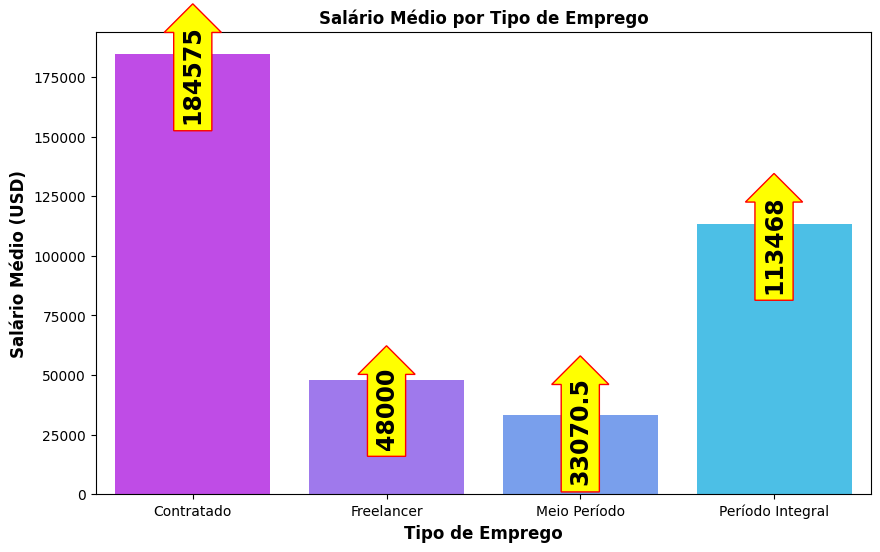

In [14]:
# SALÁRIO MÉDIO POR TIPO DE EMPREGO
salario_por_emprego = df.groupby('employment_type')['salary_in_usd'].mean()

plt.figure(figsize=(10, 6))
p = sns.barplot(y=salario_por_emprego.values, x=salario_por_emprego.index, palette='cool_r')
plt.title('Salário Médio por Tipo de Emprego', fontsize=12, fontweight='bold')
plt.xlabel('Tipo de Emprego', fontsize=12, fontweight='bold')
plt.ylabel('Salário Médio (USD)', fontsize=12, fontweight='bold')

for container in p.containers:
    plt.bar_label(container,
                  padding=-50,
                  fontsize=17,
                  bbox={'boxstyle': 'rarrow', 'edgecolor': 'red', 'facecolor': 'yellow'},
                  label_type="edge",
                  fontweight='bold',
                  rotation=90
                  )

plt.show()

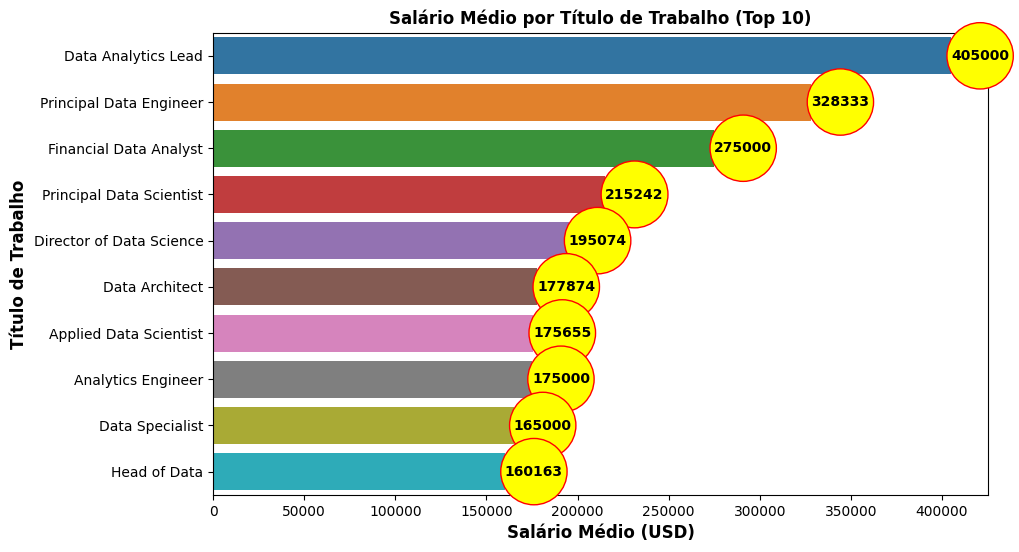

In [15]:
# SALÁRIO MÉDIO POR TÍTULO DE TRABALHO
salario_por_titulo = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
p = sns.barplot(x=salario_por_titulo.values[:10], y=salario_por_titulo.index[:10])

plt.title('Salário Médio por Título de Trabalho (Top 10)', fontsize=12, fontweight='bold')
plt.xlabel('Salário Médio (USD)', fontsize=12, fontweight='bold')
plt.ylabel('Título de Trabalho', fontsize=12, fontweight='bold')

for container in p.containers:
    p.bar_label(container,
                bbox={'boxstyle': 'circle', 'facecolor': 'yellow', 'edgecolor': 'red'},
                fontweight='bold'
                )

plt.show()


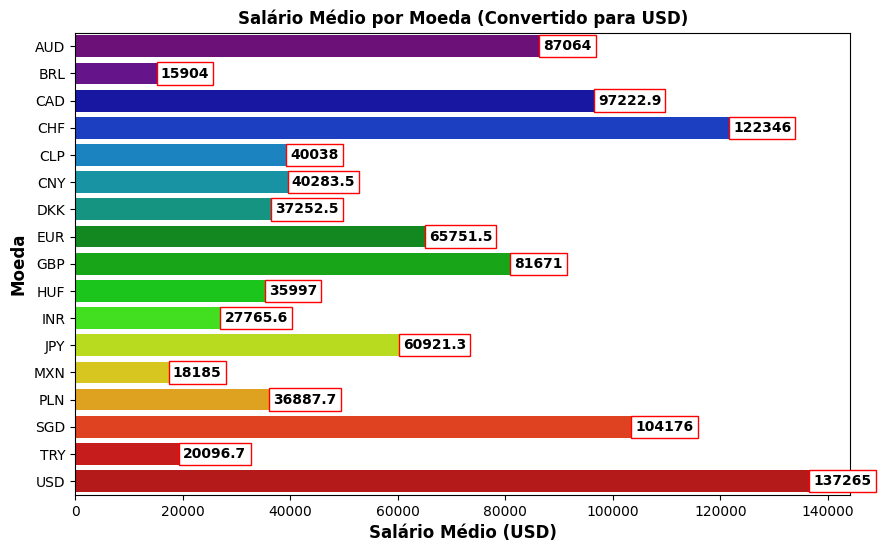

In [16]:
# SALÁRIO MÉDIO POR MOEDA (CONVERTIDO PARA USD)
salario_por_moeda = df.groupby('salary_currency')['salary_in_usd'].mean()

plt.figure(figsize=(10, 6))
p = sns.barplot(x=salario_por_moeda.values, y=salario_por_moeda.index, palette='nipy_spectral')
plt.title('Salário Médio por Moeda (Convertido para USD)', fontsize=12, fontweight='bold')
plt.xlabel('Salário Médio (USD)', fontsize=12, fontweight='bold')
plt.ylabel('Moeda', fontsize=12, fontweight='bold')

for container in p.containers:
    p.bar_label(container,
                bbox={'boxstyle': 'square', 'facecolor': 'white', 'edgecolor': 'red'},
                fontweight='bold'
                )

plt.show()

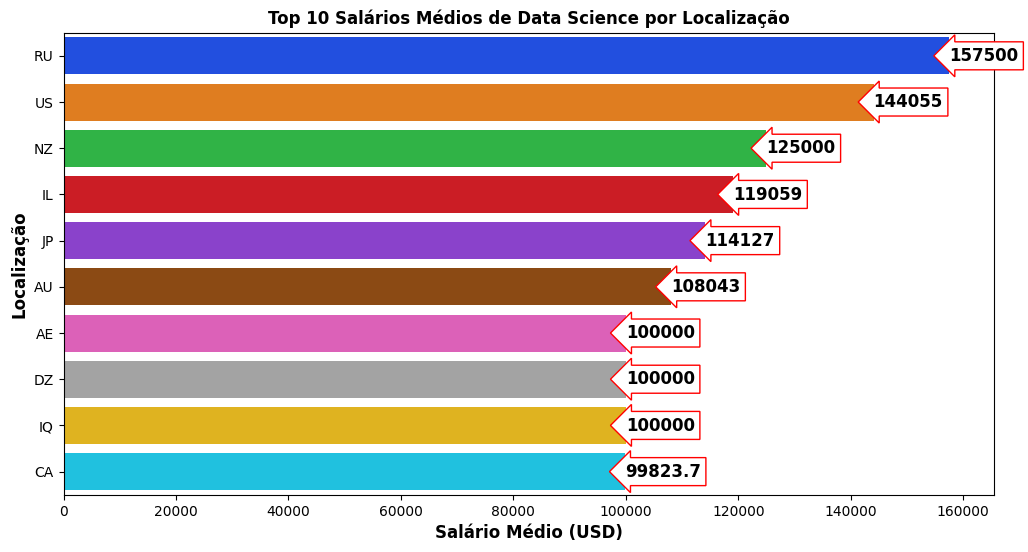

In [17]:
# SALÁRIOS MÉDIOS POR LOCALIZAÇÃO DA EMPRESA
salarios_por_localizacao = df.groupby('company_location')['salary_in_usd'].mean().reset_index()

# Ordenar as localizações por salário médio em ordem decrescente
salarios_por_localizacao = salarios_por_localizacao.sort_values(by='salary_in_usd', ascending=False)

# Selecionar as top N localizações para plotar
top_n_localizacoes = 10

# Criar um gráfico de barras para visualizar salários médios por país
plt.figure(figsize=(12, 6))
p = sns.barplot(x='salary_in_usd', y='company_location', data=salarios_por_localizacao.head(top_n_localizacoes), palette='bright')
plt.title('Top {} Salários Médios de Data Science por Localização'.format(top_n_localizacoes), fontsize=12, fontweight='bold')
plt.xlabel('Salário Médio (USD)', fontsize=12, fontweight='bold')
plt.ylabel('Localização', fontsize=12, fontweight='bold')

for container in p.containers:
    p.bar_label(container,
                fontsize=12,
                bbox={'boxstyle': 'larrow', 'edgecolor': 'red', 'facecolor': 'white'},
                label_type="edge",
                fontweight='bold'
                )

plt.show()

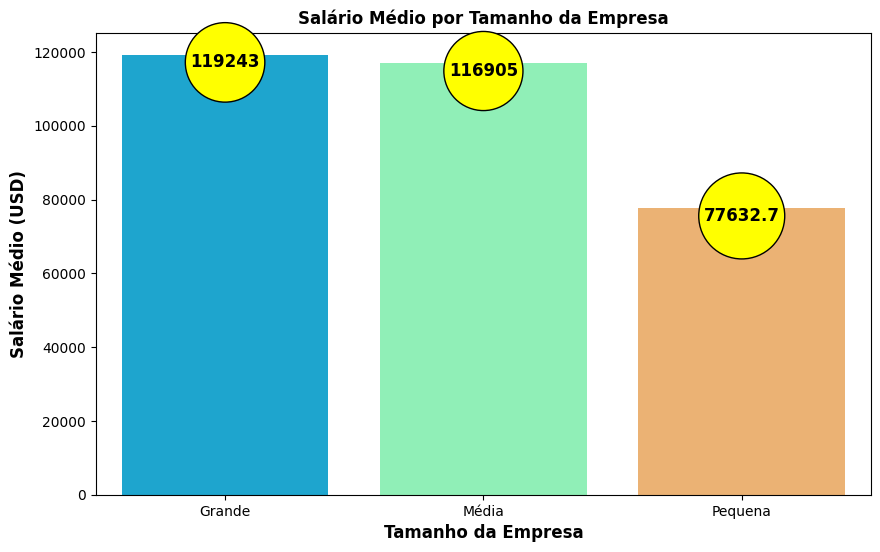

In [18]:
# SALÁRIO MÉDIO POR TAMANHO DA EMPRESA
salario_por_tamanho_da_empresa = df.groupby('company_size')['salary_in_usd'].mean()

# Plotar o salário médio por tamanho da empresa
plt.figure(figsize=(10, 6))
p = sns.barplot(x=salario_por_tamanho_da_empresa.index, y=salario_por_tamanho_da_empresa.values, palette='rainbow')
plt.title('Salário Médio por Tamanho da Empresa', fontsize=12, fontweight='bold')
plt.xlabel('Tamanho da Empresa', fontsize=12, fontweight='bold')
plt.ylabel('Salário Médio (USD)', fontsize=12, fontweight='bold')

for container in p.containers:
    p.bar_label(container, fontweight='bold',
                padding=-12,
                fontsize=12,
                bbox={'boxstyle': 'circle', 'facecolor': 'yellow', 'edgecolor': 'black'}
                )

plt.show()


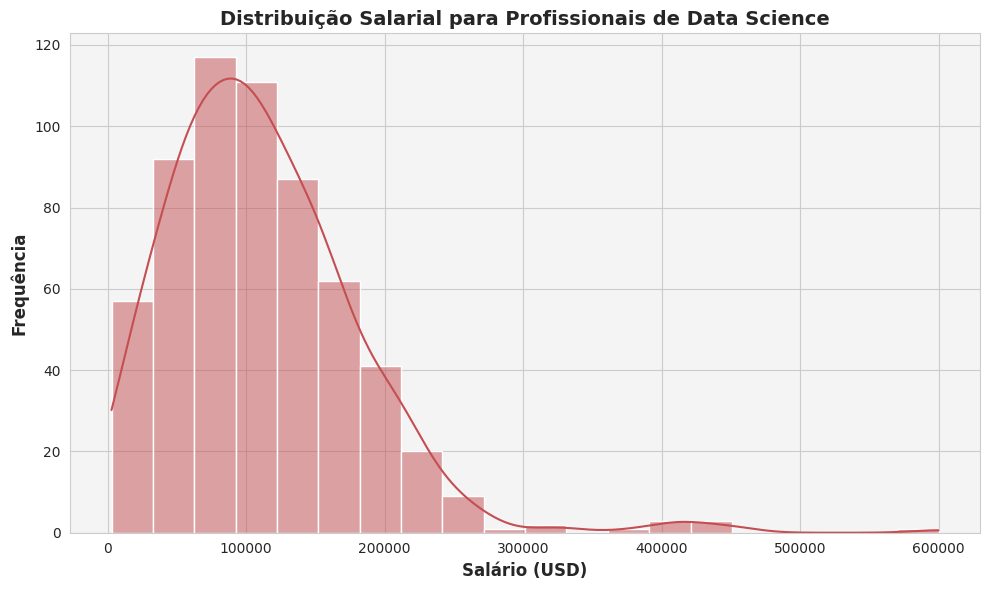

In [19]:
# DISTRIBUIÇÃO DE SALÁRIO
# Definir um estilo personalizado
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))

# Histograma da distribuição salarial para profissionais de Data Science
sns.histplot(df['salary_in_usd'], kde=True, color='#c44e52', bins=20, ax=ax)

# Personalizar rótulos e título
ax.set_title('Distribuição Salarial para Profissionais de Data Science', fontsize=14, fontweight='bold')
ax.set_xlabel('Salário (USD)', fontsize=12, fontweight='bold')
ax.set_ylabel('Frequência', fontsize=12, fontweight='bold')

# Remover ticks do eixo y
ax.tick_params(axis='y', which='both', left=False)

# Personalizar a cor de fundo
ax.set_facecolor("#f4f4f4")

# Mostrar o gráfico
plt.tight_layout()
plt.show()


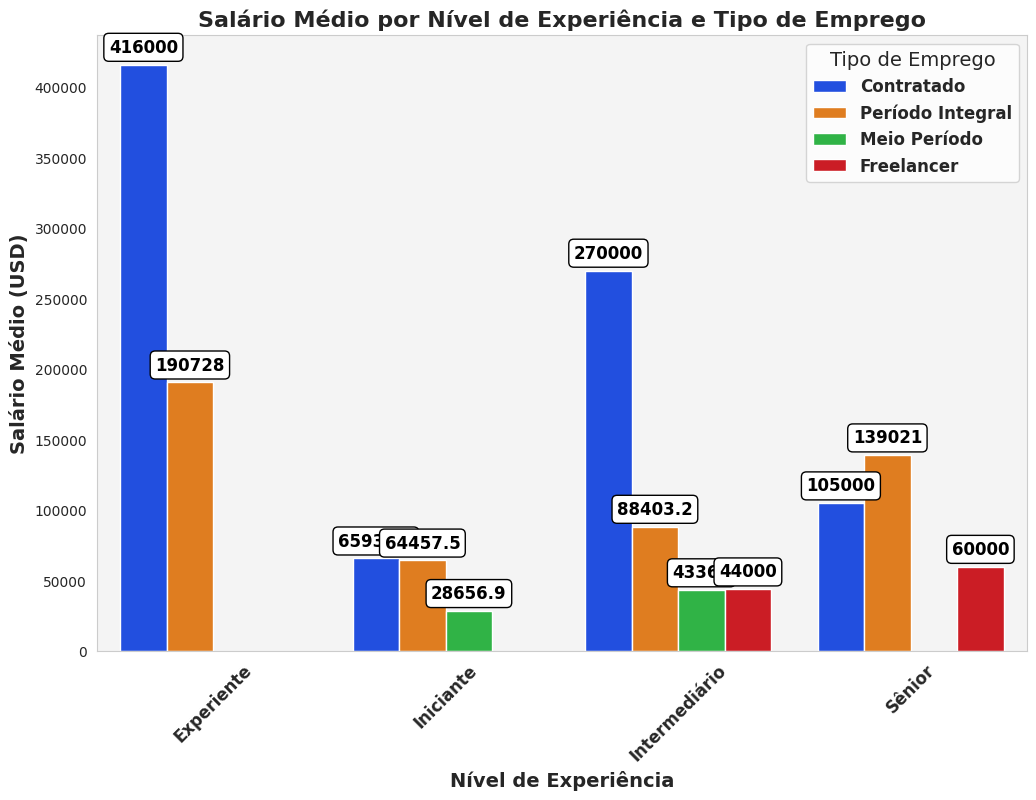

In [20]:
# MÉDIA DE SALÁRIO POR NIVEL DE EXPERIENCIA E TITULO
# Calcular o salário médio para cada combinação de nível de experiência e tipo de emprego
eficacia_de_custo = df.groupby(['experience_level', 'employment_type'])['salary_in_usd'].mean().reset_index()

# Encontrar a combinação com o salário médio mais alto (máxima eficácia de custo)
melhor_combinacao = eficacia_de_custo.loc[eficacia_de_custo['salary_in_usd'].idxmax()]

# Criar um gráfico de barras usando o Seaborn com os eixos x e y trocados
plt.figure(figsize=(12, 8))

# Usar uma paleta de cores diferente para um visual moderno
sns.set_palette(sns.color_palette('bright'))

ax = sns.barplot(x='experience_level', y='salary_in_usd', hue='employment_type', data=eficacia_de_custo)
plt.xlabel('Nível de Experiência', fontsize=14, fontweight='bold')
plt.ylabel('Salário Médio (USD)', fontsize=14, fontweight='bold')
plt.title('Salário Médio por Nível de Experiência e Tipo de Emprego', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, fontsize=12, fontweight='bold')

for container in ax.containers:
    ax.bar_label(container, label_type="edge", color="black",
                 padding=6,
                 fontweight='bold',
                 fontsize=12,
                 bbox={'boxstyle': 'round,pad=0.3', 'facecolor': 'white', 'edgecolor': 'black'})

# Aumentar o tamanho da legenda e torná-la em negrito
legend = plt.legend(title='Tipo de Emprego', fontsize=12, title_fontsize=14)
for text in legend.get_texts():
    text.set_fontweight('bold')

# Definir a cor de fundo para um cinza claro
ax.set_facecolor("#f4f4f4")

# Remover as linhas de grade
ax.grid(False)

# Mostrar o gráfico
plt.show()